<a href="https://colab.research.google.com/github/shaunak-badani/DeepLearningNotebooks/blob/master/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
pip install -q git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.5 MB/s eta 0:00:00


In [4]:
###
from diffusers import StableDiffusionPipeline
import torch

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"
# pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt = "a video of a kite flying on mars"
images = pipe(prompt).images
image = images[0]
print(f"Number of images generated: {len(images)}")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image

In [ ]:
prompt = "a photo of a student engaging in questionable activities"
images = pipe(prompt).images
image = images[0]
print(f"Number of images generated: {len(images)}")

In [ ]:
image

In [ ]:
prompt = "a photo of a student walking and running simultaneously"
images = pipe(prompt).images
image = images[0]
print(f"Number of images generated: {len(images)}")

In [ ]:
image

## Architecture of the model

### CLIP

In [ ]:
import torch
import clip
from PIL import Image


In [ ]:
!wget -q https://purepng.com/public/uploads/large/flower-2wq.png

In [ ]:
im = Image.open("/content/flower-2wq.png")
model, preprocess = clip.load("ViT-B/32", device = device)
image = preprocess(im).unsqueeze(0).to(device)

In [ ]:
text = clip.tokenize(["doodleeedoo", "panamaaaa", "koligeate"]).to(device)

In [ ]:
text.shape

In [ ]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    print(text_features.shape)

    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

# UNet architecture

In [ ]:
from torch import nn

In [ ]:
custom_image = torch.randn(1, 1, 572, 572).to(device)

In [ ]:
custom_image.shape

In [ ]:
class CustomUNet(nn.Module):

  def __init__(self, input_channels):
      super().__init__()
      self.n1 = nn.Sequential(
          nn.Conv2d(input_channels, 64, 3),
          nn.ReLU(),
          nn.Conv2d(64, 64, 3),
          nn.ReLU(),
          nn.MaxPool2d(2)
      ).to(device)
      self.n2 = nn.Sequential(
          nn.Conv2d(64, 128, 3),
          nn.ReLU(),
          nn.Conv2d(128, 128, 3),
          nn.ReLU(),
          nn.MaxPool2d(2)
      ).to(device)
      self.n3 = nn.Sequential(
          nn.Conv2d(128, 256, 3),
          nn.ReLU(),
          nn.Conv2d(256, 256, 3),
          nn.ReLU(),
          nn.MaxPool2d(2)
      ).to(device)
      self.n4 = nn.Sequential(
          nn.Conv2d(256, 512, 3),
          nn.ReLU(),
          nn.Conv2d(512, 512, 3),
          nn.ReLU(),
          nn.MaxPool2d(2)
      ).to(device)
      self.n5 = nn.Sequential(
          nn.Conv2d(512, 1024, 3),
          nn.ReLU(),
          nn.Conv2d(1024, 1024, 3),
          nn.ReLU()
      ).to(device)

      self.n6 = nn.Sequential(
          nn.Upsample(scale_factor = 2),
          nn.Conv2d(1024, 512, 3),
          nn.ReLU(),
          nn.Conv2d(512, 512, 3),
          nn.ReLU()
      ).to(device)

      self.n7 = nn.Sequential(
          nn.Upsample(scale_factor = 2),
          nn.Conv2d(512, 256, 3),
          nn.ReLU(),
          nn.Conv2d(256, 256, 3),
          nn.ReLU()
      ).to(device)


      self.n8 = nn.Sequential(
          nn.Upsample(scale_factor = 2),
          nn.Conv2d(256, 128, 3),
          nn.ReLU(),
          nn.Conv2d(128, 128, 3),
          nn.ReLU()
      ).to(device)

      self.n9 = nn.Sequential(
          nn.Upsample(scale_factor = 2),
          nn.Conv2d(128, 64, 3),
          nn.ReLU(),
          nn.Conv2d(64, 64, 3),
          nn.ReLU()
      ).to(device)

      self.final = nn.Conv2d()



  def __call__(self, x):
      x = self.n1(x)
      x = self.n2(x)
      x = self.n3(x)
      x = self.n4(x)
      x = self.n5(x)
      x = self.n6(x)
      x = self.n7(x)
      x = self.n8(x)
      x = self.n9(x)
      return x


_, C, _, _ = custom_image.shape
net = CustomUNet(C)
net(custom_image).shape

In [ ]:
!wget http://data.celltrackingchallenge.net/training-datasets/PhC-C2DH-U373.zip

In [ ]:
!unzip -q /content/PhC-C2DH-U373.zip

In [ ]:
!ls /content/PhC-C2DH-U373/01_ERR_SEG


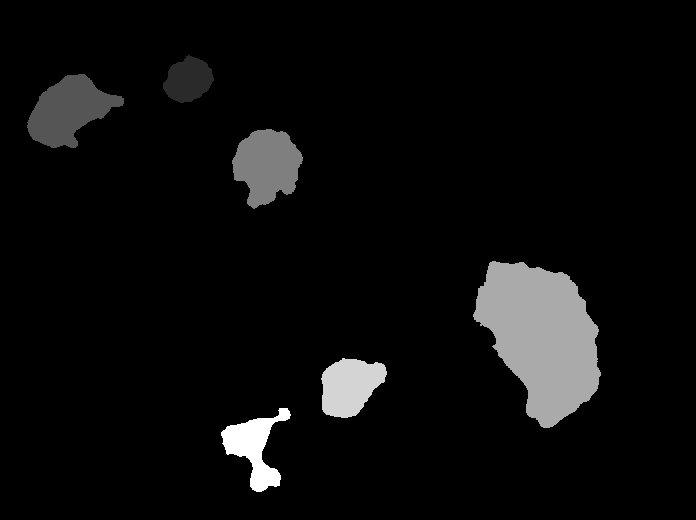

In [105]:
from google.colab.patches import cv2_imshow
from pathlib import Path
import numpy as np


def show_image(base_path, file_name):
  im = Image.open(base_path / file_name)
  scaled_image = np.array(im).astype('float32')
  scaled_image = (scaled_image - scaled_image.min()) / (scaled_image.max() - scaled_image.min())
  cv2_imshow(scaled_image * 255)

show_image(Path("/content/PhC-C2DH-U373/01_ERR_SEG/"), "mask007.tif")

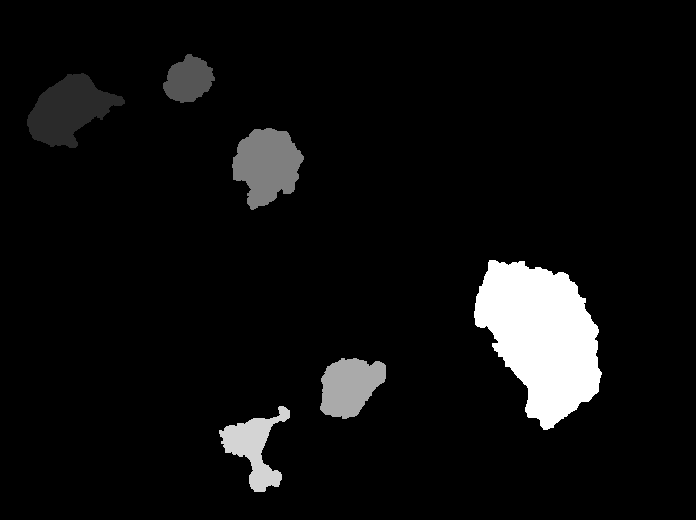

In [111]:
show_image(Path("/content/PhC-C2DH-U373/01_GT/SEG"), "man_seg007.tif")

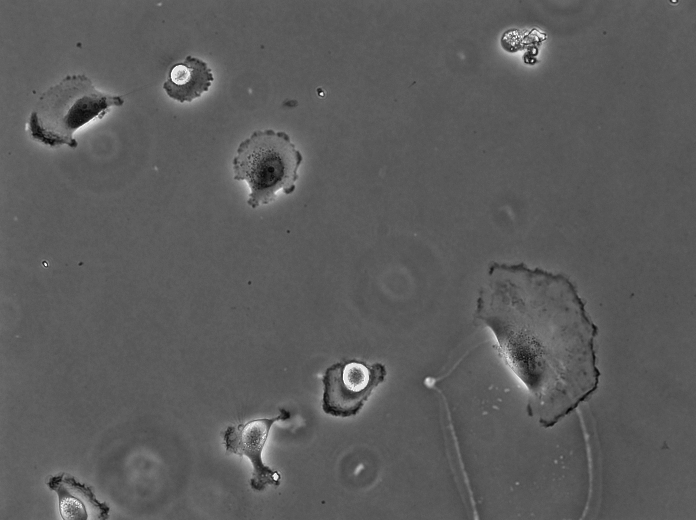

In [103]:
show_image(Path("/content/PhC-C2DH-U373/01/"), "t007.tif")

In [39]:
%%bash
du -sh /content/*

8.0K	/content/challenge-error-metrics.bsh
3.9M	/content/flower-2wq.png
31M	/content/ISBI-2012-challenge.zip
55M	/content/sample_data
7.6M	/content/test-labels.tif
7.6M	/content/test-volume.tif
7.6M	/content/train-labels.tif
7.6M	/content/train-volume.tif


In [109]:
!ls /content/PhC-C2DH-U373/01_GT/SEG

man_seg001.tif	man_seg007.tif	man_seg059.tif	man_seg075.tif	man_seg100.tif
man_seg005.tif	man_seg021.tif	man_seg067.tif	man_seg092.tif	man_seg102.tif
man_seg006.tif	man_seg049.tif	man_seg072.tif	man_seg096.tif	man_seg112.tif
